<a href="https://colab.research.google.com/github/vikaskumar04121998/practical-for-deep-learning/blob/main/Autoencodordecoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
%tensorflow_version 2.x
%pylab inline

from tensorflow import keras
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

Populating the interactive namespace from numpy and matplotlib


In [16]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
])

In [17]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [18]:
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [19]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                   optimizer='adam')

In [22]:
history = stacked_autoencoder.fit(x_train, x_train, epochs=10,validation_data=[x_test])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1035 - val_loss: 0.0000e+00
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0975 - val_loss: 0.0000e+00
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0948 - val_loss: 0.0000e+00
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0931 - val_loss: 0.0000e+00
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0917 - val_loss: 0.0000e+00
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0904 - val_loss: 0.0000e+00
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0895 - val_loss: 0.0000e+00
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0888 - val_loss: 0.0000e+00
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0883 - val_loss: 0.0000e+00
Epoch 10/10
1875/1875 [=======================

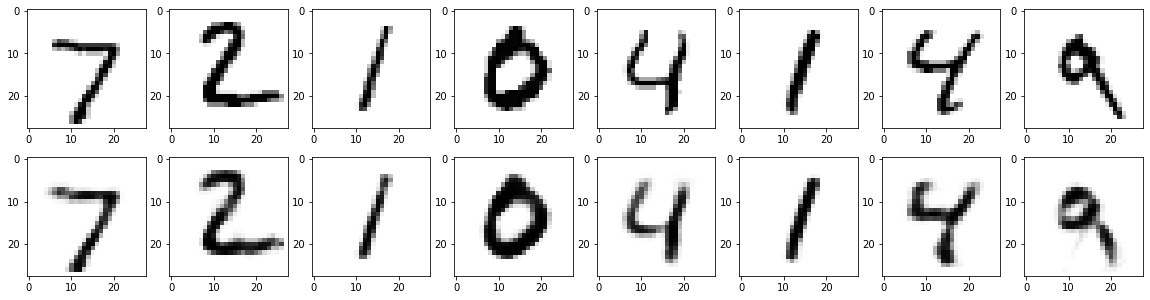

In [23]:
figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  imshow(x_test[i], cmap="binary")

  subplot(2, 8, i+8+1)
  imshow(pred.reshape((28, 28)), cmap="binary")

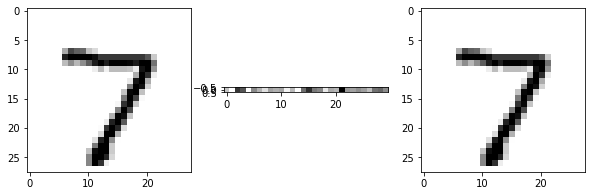

In [24]:
i = 0 # change this number

figsize(10, 5)

subplot(1, 3, 1)
imshow(x_test[i], cmap="binary")

subplot(1, 3, 2)
latent_vector = encoder.predict(x_test[i].reshape((1, 28, 28)))
imshow(latent_vector, cmap="binary")

subplot(1, 3, 3)
pred = decoder.predict(latent_vector)
imshow(x_test[i], cmap="binary")

In [25]:
30 / (28 * 28), 1 - 30 / (28 * 28)

(0.03826530612244898, 0.9617346938775511)

In [28]:
encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2)
])

In [29]:
encoder.predict(x_test[0].reshape((1, 28, 28))).shape

(1, 3, 3, 64)

In [30]:
decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=(3, 3), strides=2, padding="valid",
                                 activation="relu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=(3, 3), strides=2, padding="same",
                                 activation="relu"),
    keras.layers.Conv2DTranspose(1, kernel_size=(3, 3), strides=2, padding="same",
                                 activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [31]:
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [32]:
stacked_autoencoder.compile(loss="binary_crossentropy", optimizer='adam')

In [33]:
history = stacked_autoencoder.fit(x_train, x_train, epochs=10,validation_data=[x_test, x_test])

Epoch 1/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1956 - val_loss: 0.0000e+00
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0829 - val_loss: 0.0000e+00
Epoch 3/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0777 - val_loss: 0.0000e+00
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0751 - val_loss: 0.0000e+00
Epoch 5/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0735 - val_loss: 0.0000e+00
Epoch 6/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0723 - val_loss: 0.0000e+00
Epoch 7/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0714 - val_loss: 0.0000e+00
Epoch 8/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0708 - val_loss: 0.0000e+00
Epoch 9/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0701 - val_loss: 0.0000e+00
Epoch 10/10
1875/1875 [=====

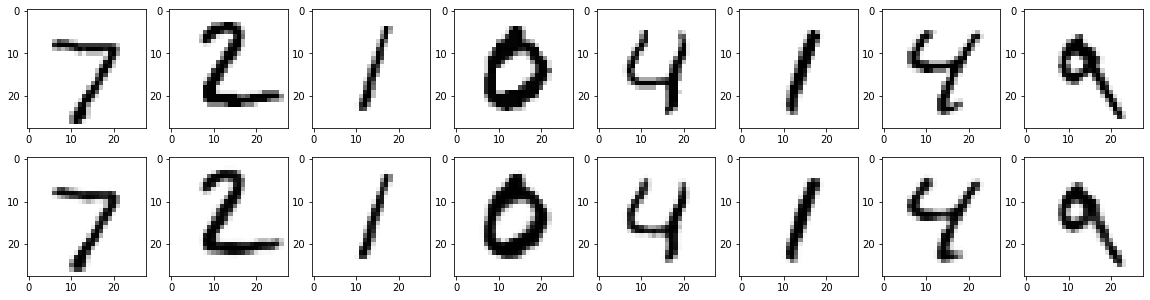

In [34]:
figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  imshow(x_test[i], cmap="binary")

  subplot(2, 8, i+8+1)
  imshow(pred.reshape((28, 28)), cmap="binary")

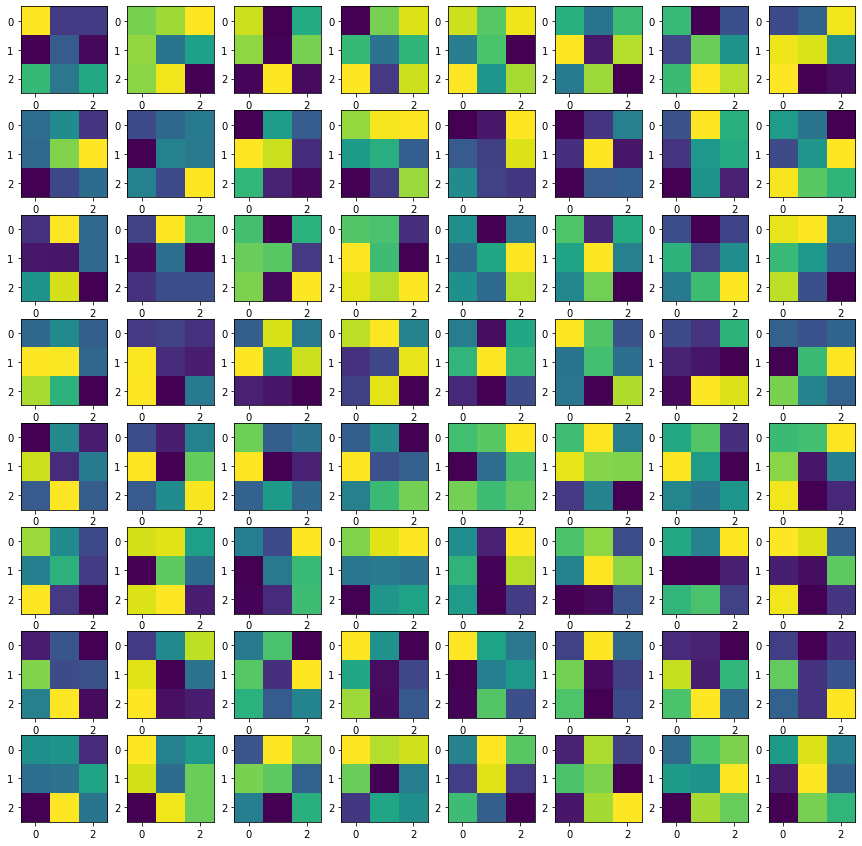

In [35]:
figsize(15, 15)
for i in range(8 * 8):
  subplot(8, 8, i+1)
  imshow(encoder.layers[-2].weights[0][:, :, 0, i])

In [36]:
import numpy as np

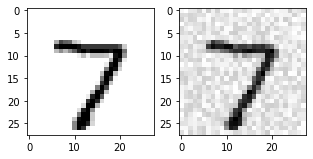

In [37]:
figsize(5, 10)
subplot(1, 2, 1)
imshow(x_test[0], cmap="binary")

subplot(1, 2, 2)
noise = np.random.random((28, 28)) / 4
imshow(x_test[0] + noise, cmap="binary")

In [38]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu")
])

In [39]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [40]:
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [41]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                            optimizer='adam')

In [42]:
x_train_noise = x_train + ((np.random.random(x_train.shape)) / 4)
x_test_noise = x_test + ((np.random.random(x_test.shape)) / 4)

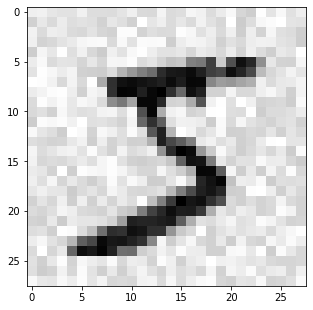

In [43]:
imshow(x_train_noise[0], cmap="binary")

In [45]:
history = stacked_autoencoder.fit(x_train_noise, x_train, epochs=10,validation_data=[x_test_noise])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1193 - val_loss: 0.0000e+00
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1113 - val_loss: 0.0000e+00
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1062 - val_loss: 0.0000e+00
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1029 - val_loss: 0.0000e+00
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1003 - val_loss: 0.0000e+00
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0984 - val_loss: 0.0000e+00
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0972 - val_loss: 0.0000e+00
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0963 - val_loss: 0.0000e+00
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0955 - val_loss: 0.0000e+00
Epoch 10/10
1875/1875 [===================

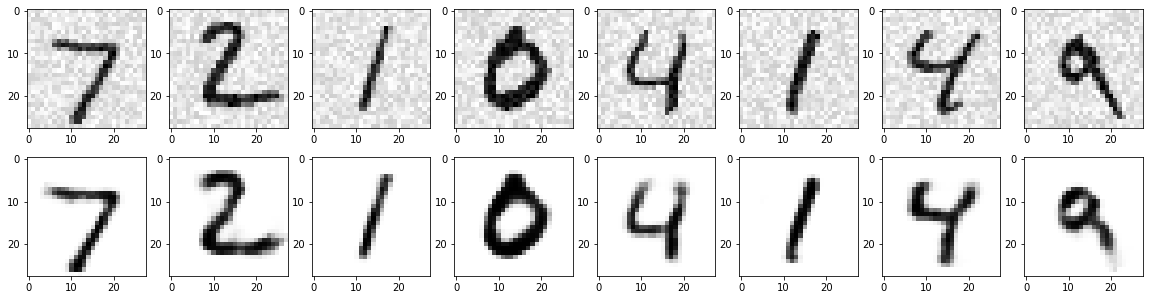

In [46]:
figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  imshow(x_test_noise[i], cmap="binary")

  subplot(2, 8, i+8+1)
  pred = stacked_autoencoder.predict(x_test_noise[i].reshape((1, 28, 28)))
  imshow(pred.reshape((28, 28)), cmap="binary")